# Introduction

Sentiment analysis of ChatGPT among Twitter users from the months of November 2022 - April 2023



<img src="ChatGPT_logo.jpg" alt="Alternative text" />



By Edwin Torres, Justin Robinson, and Josue Velasquez

## What is Chat-GPT?

With the recent release of Chat GPT-4, many people are enthralled by the program's capabilities, and many are also expressing concerns regarding the implications that come with releasing a powerful AI open for anyone and everyone who desires it. What exactly is Chat-GPT? Chat GPT is an Artificial Intelligence chatbot developed and released by OpenAI, a research team of scientists and engineers working to further develop the capabilities of artificial intelligence. According to OpenAI Chat-GPT is powered by a deep learning model, which is a type of neural network designed to process and generate language. GPT learns by being fed large amounts of data and text, which it processes and "learns" to discuss and generate answers about that data in the same context in which it took in that data. With the recent increase investment, users, and media coverage on the platform, the larger public is now beginning to grapple with the impact AI could have on virtual every aspect of society including business, education, art, and finance.

## Why is it important to discuss?

The advancement of powerful natural language processing technology has come rapidly, opening up possibilities for its users and empowering people to do more with their computers. Chat-GPT 4 has been used to aid education, programming work, day-to-day inquiries, and can even be used for data analysis. Recently, the AI powering Chat GPT-4 has been used to code entire programs, and even create falsified videos and audio files. While its capabilities are incredible, its release to the public as a chat-bot has also caused concern amongst many. Some worry about it perceived unlimited access to information that can out match a human counterpart easily, and scifi-like concerns about its ability to become more powerful than humans and overpower us are common. While AI sounds like something that is bound to a computer screen, many governments, such as Germany, have started drafting legislation in response to the development of AI’s such as Chat-GPT 4. One thing is certain, powerful AI is here to stay and how it is perceived and used by the public everyday will dictate how we move forward with the new technology. 

## Purpose

The Purpose of this tutorial is to analyze the sentiments surrounding recent advancements in AI technology and determine the general attitude towards AI technology, such as Chat-GPT. Understanding this sentiment will help guide our future course of action for developing and releasing subsequent AI tools, as well as the formulations of relevant policies that aim to mitigate potential risks associated with AI and educate the public about the capabilities these platforms possess.

## Hypothesis

We suspect the sentiment towards Chat GPT before its popularity was neutral. We also suspect that many people may fear AI based on potrayals in movies and television, and over time negative sentiment will increase as popularity increases.

<h2>Data Collection</h2>

With Chat-GPT being arguably the most popular and most discussed release of AI software in recent history, we decided to center our data collection around tweets from the popular social media platform Twitter. Specifically, we focused on tweets containing the hashtag #ChatGPT starting from the initial launch of the OpenAI chatbot in November 2022 until April 7th, 2023. Our analysis revolves around the tweet content, the number of likes it received, and the number of retweets it accumulated. By assessing the overall sentiment of each tweet as either positive or negative, we aim to determine the general perception of Twitter users regarding Chat-GPT.

<h2>Imports</h2>

In [39]:
#Add imports
import pandas as pd
import numpy as np
from textblob import TextBlob as tb
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler

These python libraries will aid in collecting, analyzing, and displaying our data. A few of the most important are texblob, which will perform our sentiment analysis, and seaborn and matplotlib, which handle creating graphs and charts, as well as some machine learning algorithms.

## Collecting Data

Here we read the tweets from our .tsv file and store them in a Pandas DataFrame. We also dropped any columns that we don't need. Now we can focus more on the content of the tweets, their creation date, and the likes and retweets of each tweet.

In [40]:
#read tweets into dataframe
df = pd.read_csv("archive/ChatGPT.csv",low_memory=False)

#remove unneccessary columns (subject to change)
df.drop(columns=['Unnamed: 0', 'Location', 'Description', 'UserCreated', 'UserVerified'], axis=1, inplace=True)

df.head()

,Date,Tweet,Url,User,UserFollowers,UserFriends,Retweets,Likes
0,2023-04-08 03:33:13+00:00,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,50.0,76.0,0,0
1,2023-04-08 03:32:16+00:00,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,9056.0,387.0,0,0
2,2023-04-08 03:32:05+00:00,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,276.0,313.0,0,0
3,2023-04-08 03:31:08+00:00,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,312.0,293.0,0,0
4,2023-04-08 03:30:51+00:00,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,522.0,684.0,0,2


## Data Processing

### Format Date Field

Here we format the date field as datetime object instead of a string, allowing us to easily compare dates to one another.

In [41]:
#create datetime column for date
df['Date'] = df['Date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Tweet,Url,User,UserFollowers,UserFriends,Retweets,Likes
0,2023-04-08,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,50.0,76.0,0,0
1,2023-04-08,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,9056.0,387.0,0,0
2,2023-04-08,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,276.0,313.0,0,0
3,2023-04-08,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,312.0,293.0,0,0
4,2023-04-08,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,522.0,684.0,0,2


## Tweet Volume Over Time

<b>Group tweets by date and plot over time</b>

We first want to get a sense of overall popularity of Chat-GPT. One way to do that is by analyzing the volume of tweets over time. Here we group all tweets by date and use matplotlib to plot the results.

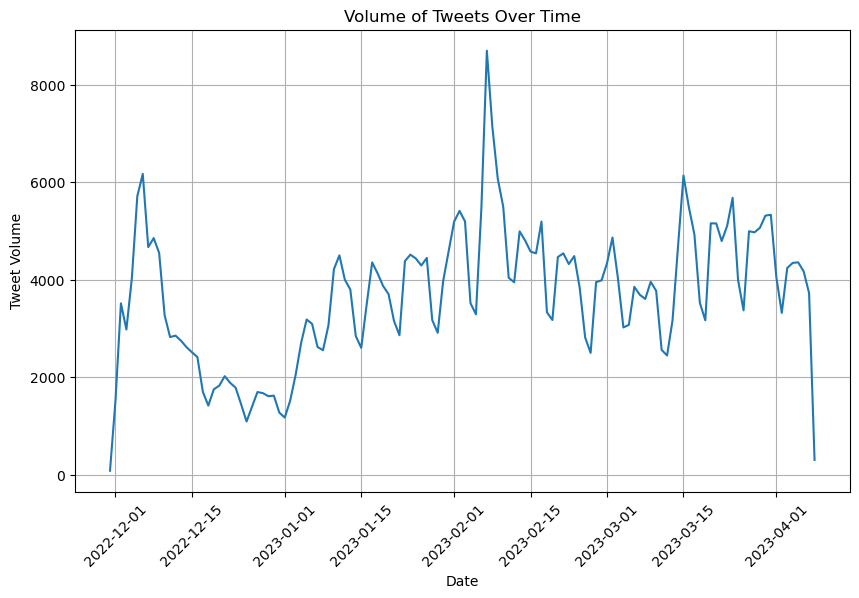

In [42]:
# Group by date and count the tweets
tweets_by_date = df.groupby('Date')['Tweet'].count()

# Create a line chart of the volume of tweets over time
plt.figure(figsize=(10, 6))
plt.plot(tweets_by_date.index, tweets_by_date)
plt.xlabel("Date")
plt.ylabel("Tweet Volume")
plt.title("Volume of Tweets Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Here we can see an initial spike in interesst around the release of the platform, which then tapers off, followed by a gradual increase in interest starting in January of 2023 and then an exponential spike in March before returning to previous level.

## Finding the attidue of tweets

<b>Use the TextBlob library to analyze tweet attitudes</b>

Here we pass all tweets in our data frame and use the TextBlob library to get sentiment scores for each tweet. The sentiment scores are stored in a new column called ***Sentiment*** rated between -1 and 1. Sentiment analysis is helpful in determining attitudes conveyed in large samples of text automatically. More information on sentiment analysis can be found 
[here](https://www.freecodecamp.org/news/what-is-sentiment-analysis-a-complete-guide-to-for-beginners/).

In [43]:
#create fucntion using textblob to gauge attitudes
def get_attitudes(tweet):
    result = tb(tweet)
    attitude = result.sentiment.polarity
    return attitude

In [44]:
#get the attitude score for each tweet
df['Tweet'] = df['Tweet'].astype(str)
df['Attitudes'] = df['Tweet'].apply(get_attitudes)
df.head()

,Date,Tweet,Url,User,UserFollowers,UserFriends,Retweets,Likes,Attitudes
0,2023-04-08,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,50.0,76.0,0,0,0.000000
1,2023-04-08,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,9056.0,387.0,0,0,0.466667
2,2023-04-08,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,276.0,313.0,0,0,0.170455
3,2023-04-08,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,312.0,293.0,0,0,0.000000
4,2023-04-08,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,522.0,684.0,0,2,0.200000


## Classify Attitudes Into Positive Negative and Neutral

Here we group tweets by date and range of attitude. Less than zero indicates a negative tweet, and greater than zero indicates a positive tweet, with zero being neutral.

In [45]:
#Group attitudes into positive, negative, and neutral based on 
def classify_attitude(attitude):
    if attitude < 0:
        return 'Negative'
    elif attitude > 0:
        return 'Positive'
    else:
        return 'Neutral'
df['AttitudeClass'] = df['Attitudes'].apply(classify_attitude)

<h2>Proportion of Tweet Volume by Attitude Class</h2>

Next we calculate what percentage of tweet were positive, negative, or neutral for each date and then plot their changes over time

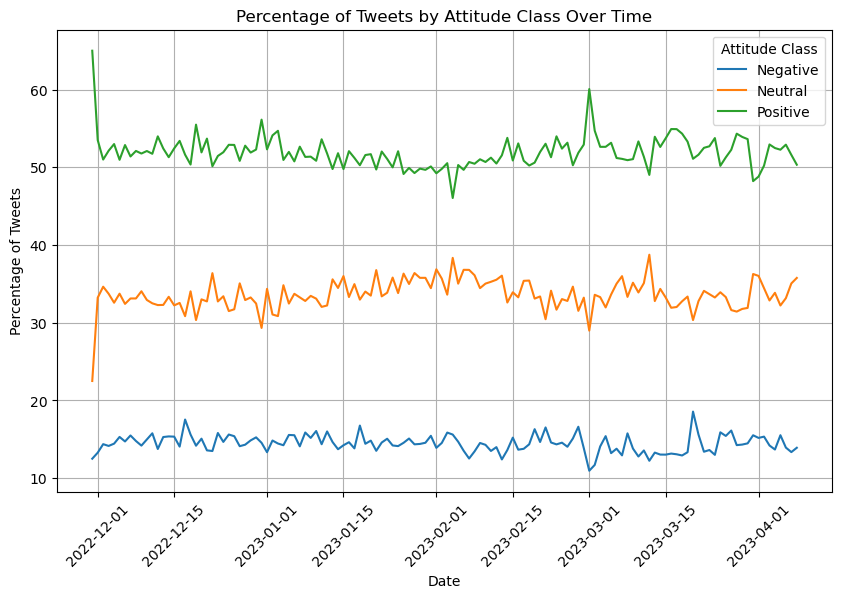

In [46]:
# Group by date and attitude class, then count the tweets
tweets_by_date_attitude = df.groupby(['Date', 'AttitudeClass'])['Tweet'].count().unstack()

# Calculate the total number of tweets per day
daily_total_tweets = tweets_by_date_attitude.sum(axis=1)

# Calculate the percentage of tweets for each attitude class
tweets_percentage_by_date_attitude = tweets_by_date_attitude.div(daily_total_tweets, axis=0) * 100

# Create a line chart of the percentage of tweets by attitude class over time
plt.figure(figsize=(10, 6))
plt.plot(tweets_percentage_by_date_attitude)
plt.xlabel("Date")
plt.ylabel("Percentage of Tweets")
plt.title("Percentage of Tweets by Attitude Class Over Time")
plt.xticks(rotation=45)

plt.legend(['Negative', 'Neutral', 'Positive'], title='Attitude Class')
plt.grid()
plt.show()

From the plot we can see that there are very clear divissions in the percentages of tweets for each sentiment category. Overall, tweets expressing negative sentiment make up 10% to 20% of the data, neutral sentiment remians between 30% and 40%, and positive sentiment hovers around 50%, with some spikes occasionally bringing its share up to 55% to %60.

## Normalize attiudes so we can compare more easily

We used the MinMaxScaler package from scikit-learn to normalize the attiudes between 0 and 1. The reason for normalization is that the attiudes are usually between -1 and 1 which can make it difficult to manipulate the results. For example, in the following code block we apply weights to tweets based on likes and retweets, which would yield inconsistent results if our range for the data remained between -1 and 1.

In [47]:
#normalize attitude scores
# Create a MinMaxScaler object
scalar = MinMaxScaler()

# Reshape the attitude scores
attitude_scores = df['Attitudes'].values.reshape(-1, 1)

# Perform the Min-Max scaling on the attitude scores
normalized_scores = scalar.fit_transform(attitude_scores)

# Update the column in the DataFrame with the normalized scores
df['Normalized_Attitudes'] = normalized_scores

## Plotting ditribution of attitude scores

Using the newly calculated **Normalized_Attitudes** scores, we plot their distribution across the spectrum from 0 to 1.

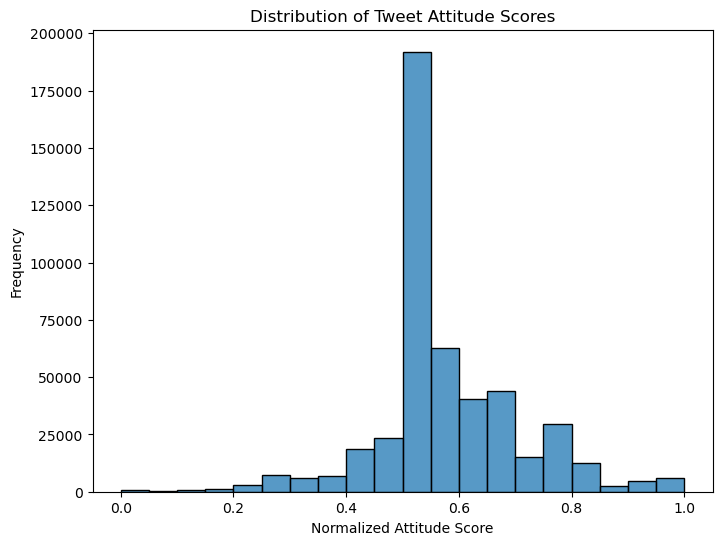

In [48]:
#plot the results
# Plot the distribution of tweet attitude scores
plt.figure(figsize=(8, 6))
sns.histplot(df['Normalized_Attitudes'], bins=20)
plt.xlabel('Normalized Attitude Score')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Attitude Scores')
plt.show()

Here we see our first indication of overall sentiment as the distribution of attitude scores has a slight left skew.

## Give weights to likes and Retweets to calculate a popularity score

Now that our data is normalised, we can apply weight to each tweet. The idea here is that a tweets with more engagement (likes and retweets) are more reflective of public sentiment. More information on the concept of weighting data can be found [here](https://www.kdnuggets.com/2019/11/machine-learning-what-why-how-weighting.html).

To calculate our score, we give a weight of .5 to each like and weight of .2 to retweets, the idead being that a likes represent direct support for the content of a tweet, while retweeting can be done with both negative and positive sentiment.

Finally, we multiply each tweet's sentiment score by their popularity score and get a final **weighted_score** for each tweet.

In [49]:
# Define weights to likes and retweets
like_weight = 0.5
rt_weight = 0.2

#convert likes and retweets to numeric values
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').fillna(0)
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce').fillna(0)

#calculated weighted scores
popularity = pd.DataFrame()
popularity['weighted_likes'] = df['Likes'] * like_weight
popularity['weighted_rt'] = df['Retweets'] * rt_weight

#get overall popularity score
df['Popularity_Score'] = popularity['weighted_likes'] + popularity['weighted_rt']

# Calculate the weighted score by multiplying the attitude score with the popularity score
df['weighted_score'] = df['Normalized_Attitudes'] * df['Popularity_Score']

df.tail()


,Date,Tweet,Url,User,UserFollowers,UserFriends,Retweets,Likes,Attitudes,AttitudeClass,Normalized_Attitudes,Popularity_Score,weighted_score
478342,2022-11-30,@OpenAI 's new #ChatGPT is insane\nPrompt: An ...,https://twitter.com/david_teather/status/15980...,david_teather,103.0,87.0,0.0,3.0,-0.431818,Negative,0.284091,1.5,0.426136
478343,2022-11-30,ChatGPT first look - https://t.co/16K2NlmOoY. ...,https://twitter.com/StuJLans/status/1598021893...,StuJLans,754.0,281.0,2.0,3.0,0.475000,Positive,0.737500,1.9,1.401250
478344,2022-11-30,OK so @OpenAI's new #ChatGPT can basically jus...,https://twitter.com/GuyP/status/15980207810655...,GuyP,32709.0,5611.0,4002.0,23176.0,0.278788,Positive,0.639394,12388.4,7921.067879
478345,2022-11-30,Just in! \n#ChatGPT - research early stage GPT...,https://twitter.com/mssawan/status/15980195482...,mssawan,170.0,246.0,1.0,1.0,0.100000,Positive,0.550000,0.7,0.385000
478346,2022-11-30,#ai Models are set to become the search engine...,https://twitter.com/ttuccoo/status/15980174391...,ttuccoo,121.0,402.0,1.0,2.0,0.000000,Neutral,0.500000,1.2,0.600000


## Group Dates by Month

Now we crate a new column **Month_Year** from the date field so that we may focus more on tweets by months, as opposed to by individual days. 

In [50]:
#convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# #filter out the day portion of the date column for easier grouping
df['Month_Year'] = df['Date'].dt.strftime('%Y-%m')

df.head()


,Date,Tweet,Url,User,UserFollowers,UserFriends,Retweets,Likes,Attitudes,AttitudeClass,Normalized_Attitudes,Popularity_Score,weighted_score,Month_Year
0,2023-04-08,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,50.0,76.0,0.0,0.0,0.000000,Neutral,0.500000,0.0,0.0,2023-04
1,2023-04-08,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,9056.0,387.0,0.0,0.0,0.466667,Positive,0.733333,0.0,0.0,2023-04
2,2023-04-08,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,276.0,313.0,0.0,0.0,0.170455,Positive,0.585227,0.0,0.0,2023-04
3,2023-04-08,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,312.0,293.0,0.0,0.0,0.000000,Neutral,0.500000,0.0,0.0,2023-04
4,2023-04-08,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,522.0,684.0,0.0,2.0,0.200000,Positive,0.600000,1.0,0.6,2023-04


## Violin plot of attitudes over time

Here we use the seaborn library to create a violin plot of the distribution of tweet sentiment over time. We can see that the most variation comes from data for November of 2022, but for each month after there continues to be a skew in the positive direction, although less pronounced than the first month, and there is an increase in neutral tweets overall. More information on violin plots can be found [here](https://chartio.com/learn/charts/violin-plot-complete-guide/).

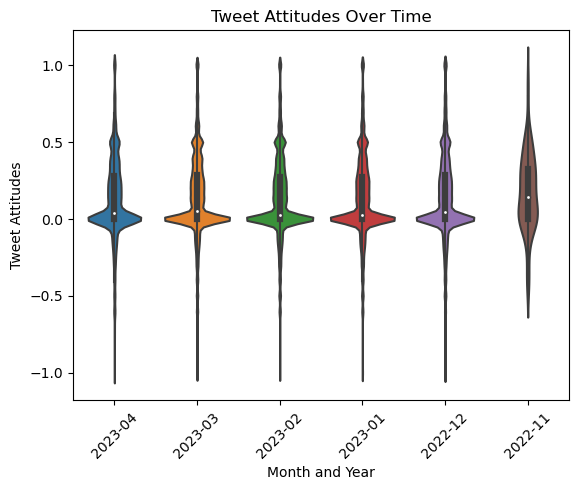

In [51]:
# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

sns.violinplot(x='Month_Year', y='Attitudes', data=df)
plt.xticks(rotation=45)
plt.xlabel('Month and Year')
plt.ylabel('Tweet Attitudes')
plt.title('Tweet Attitudes Over Time')
plt.show()

## Correlation plot 

Next we use matplotlib to generate a scatter plot of the **weighted_scores***

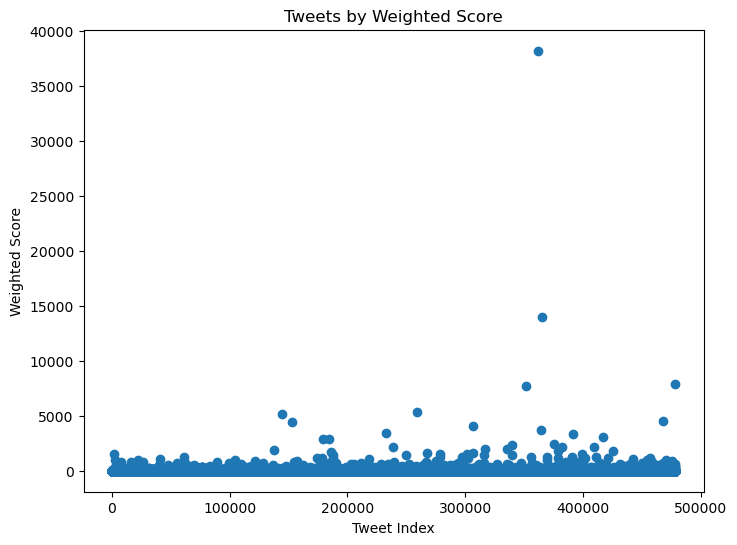

In [52]:
# Plot tweets by weighted score
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['weighted_score'])
plt.xlabel('Tweet Index')
plt.ylabel('Weighted Score')
plt.title('Tweets by Weighted Score')
plt.show()

Here the weighted scores of each tweet are close to zero, with the exception of several outliers and only one tweet entirely separated from the rest of the data. We noticed many tweets with higher weighted scores contained links to outside websites. This prompted us to take a closer look at how these tweets were affecting our dataset.

## Lets see if things change if we remove tweets with links

To examine if advertisement tweets were skewing our data, we used a regular expression to remove any tweets containing links to outside websites. We anticipate that upon removal of those tweets we will find a more balanced spread of sentiments in both directions.

In [53]:
max_value = df['weighted_score'].max()
max_value_row = df[df['weighted_score'] == max_value]

print(max_value_row['Tweet'].values)


['Best AI Tools You Need To Know\n#chatgpt #chatgpt3 #ArtificialIntelligence #ai https://t.co/0jfr8cOMoo']


In [54]:
#Try removing tweets with links to avoid advertising
url_pattern = re.compile(r'https?://(?!twitter\.com)\S+|www\.(?!twitter\.com)\S+')

# Filter out entries containing URLs
df_f = df[~df['Tweet'].str.contains(url_pattern)]

max_value = df_f['weighted_score'].max()
max_value_row = df_f[df_f['weighted_score'] == max_value]

print(max_value_row)

             Date                                  Tweet  \
339346 2023-01-19  #ChatGPT would top all Indian exams !   

                                                      Url     User  \
339346  https://twitter.com/malpani/status/16160461697...  malpani   

        UserFollowers  UserFriends  Retweets   Likes  Attitudes AttitudeClass  \
339346        52399.0       2503.0     180.0  5603.0      0.625      Positive   

        Normalized_Attitudes  Popularity_Score  weighted_score Month_Year  
339346                0.8125            2837.5      2305.46875    2023-01  


As we can see the top tweet previously posted had a link to a youtube video, and has changed since removing tweets with links.

## Distribution of tweets without links 

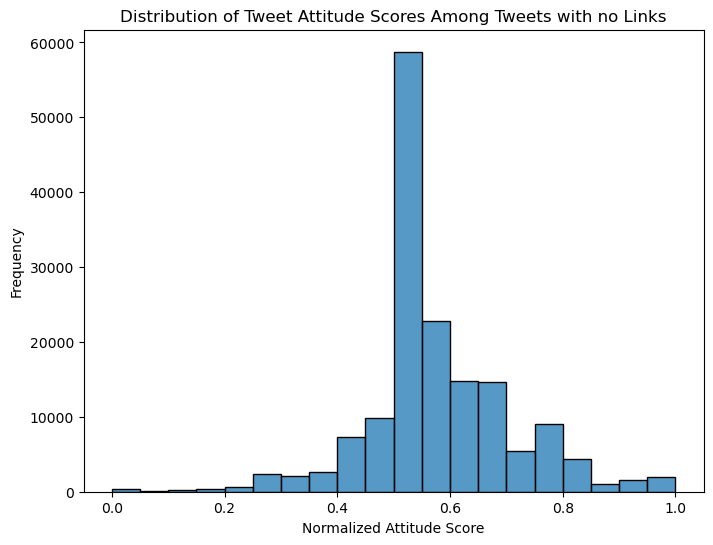

In [55]:
plt.figure(figsize=(8, 6))
sns.histplot(df_f['Normalized_Attitudes'], bins=20)
plt.xlabel('Normalized Attitude Score')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Attitude Scores Among Tweets with no Links')
plt.show()


We found that the distribution did not actually change much. It could mean that advertising tweets are not influencing the data set, but a more careful approach to assessing whether a tweet is an ad is needed to confirm this. For now, we will disregard the new filtered data.

## Correlation plots for relevant features


Next we compare our normalized attitude score to the general metrics of popularity on twitter (likes, retweets, and follower count), as well as our custom **weighted score** metric.

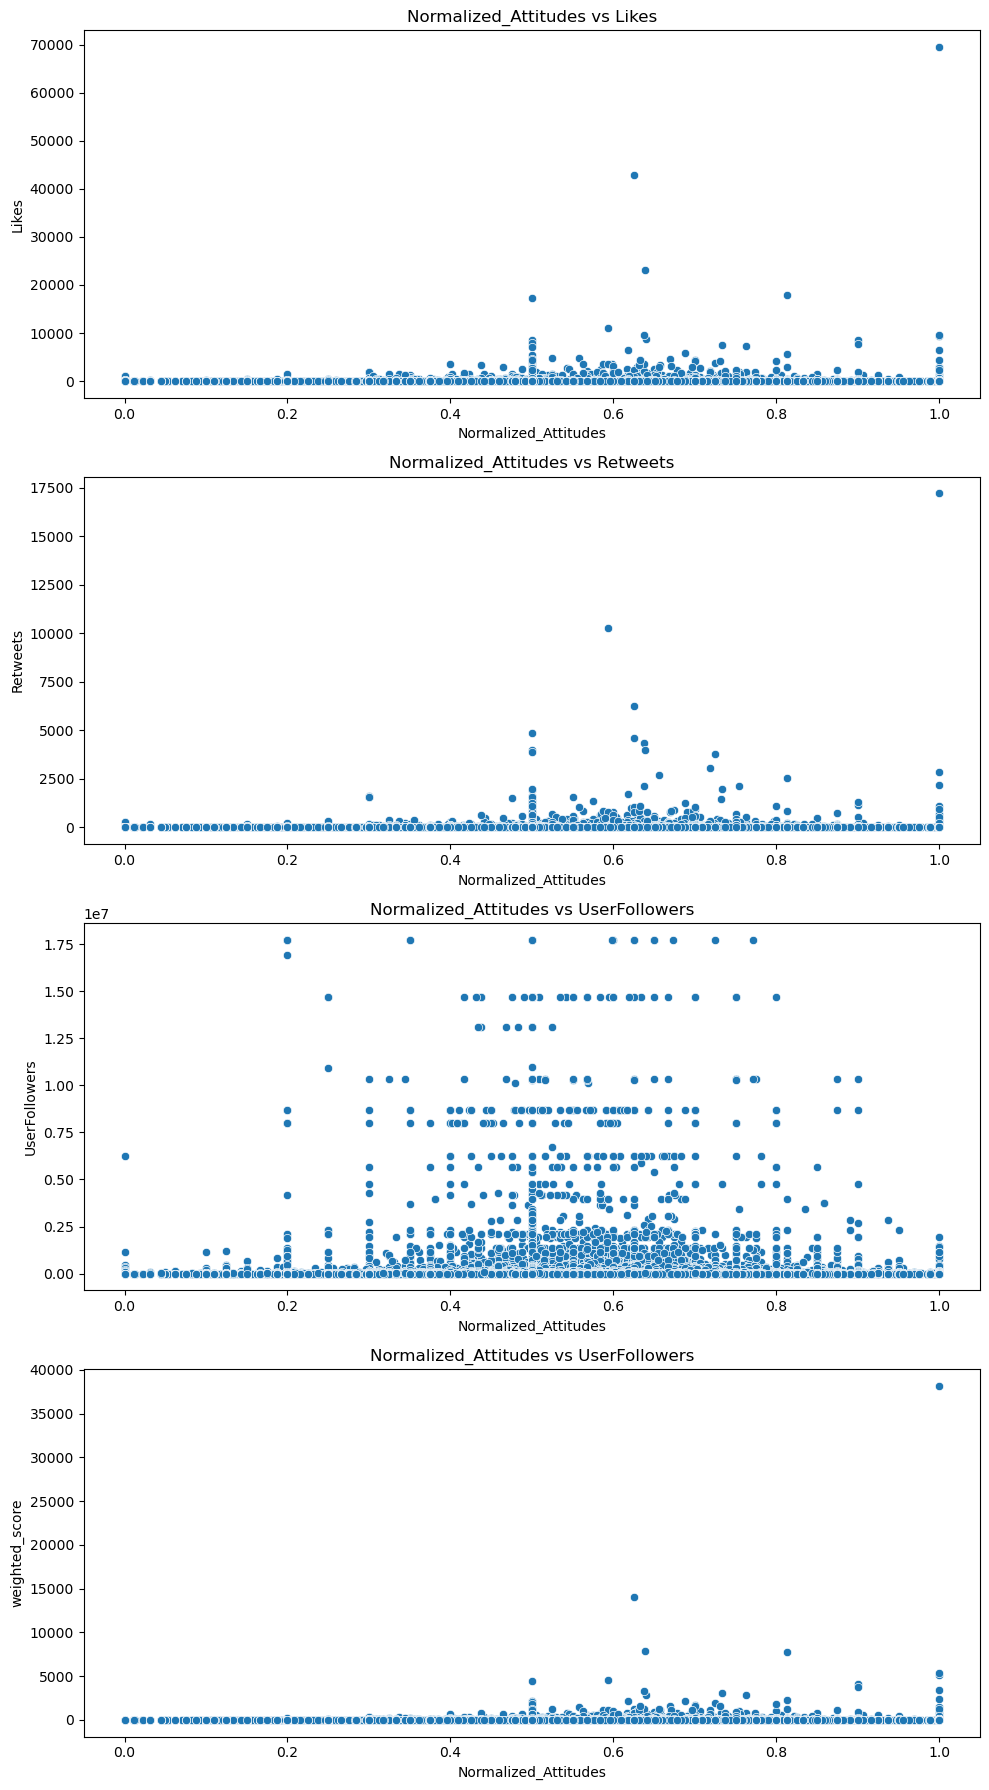

In [56]:
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# Scatter plot for Normalized_Attitudes and Likes
sns.scatterplot(x='Normalized_Attitudes', y='Likes', data=df, ax=axs[0])
axs[0].set_title('Normalized_Attitudes vs Likes')

# Scatter plot for Normalized_Attitudes and Retweets
sns.scatterplot(x='Normalized_Attitudes', y='Retweets', data=df, ax=axs[1])
axs[1].set_title('Normalized_Attitudes vs Retweets')

# Scatter plot for Normalized_Attitudes and UserFollowers
sns.scatterplot(x='Normalized_Attitudes', y='UserFollowers', data=df, ax=axs[2])
axs[2].set_title('Normalized_Attitudes vs UserFollowers')

# Scatter plot for Normalized_Attitudes and UserFollowers
sns.scatterplot(x='Normalized_Attitudes', y='weighted_score', data=df, ax=axs[3])
axs[3].set_title('Normalized_Attitudes vs UserFollowers')

plt.tight_layout()
plt.show()

Viewing the above scatter plots, we notice a what appears to be an even distribution across the spectrum of sentiment for tweets with low counts for likes, retweets, and followers counts. As those metrics of popularity grow, we do start to notice a  shift toward more positive attitudes in relation to retweets and likes while follower count yields a more even distribution.

<h2>Focusing on Lower Scored Tweets</h2>

To get a better view of the data we use our ***weighted_score*** to filter out the outliers and plot the results.

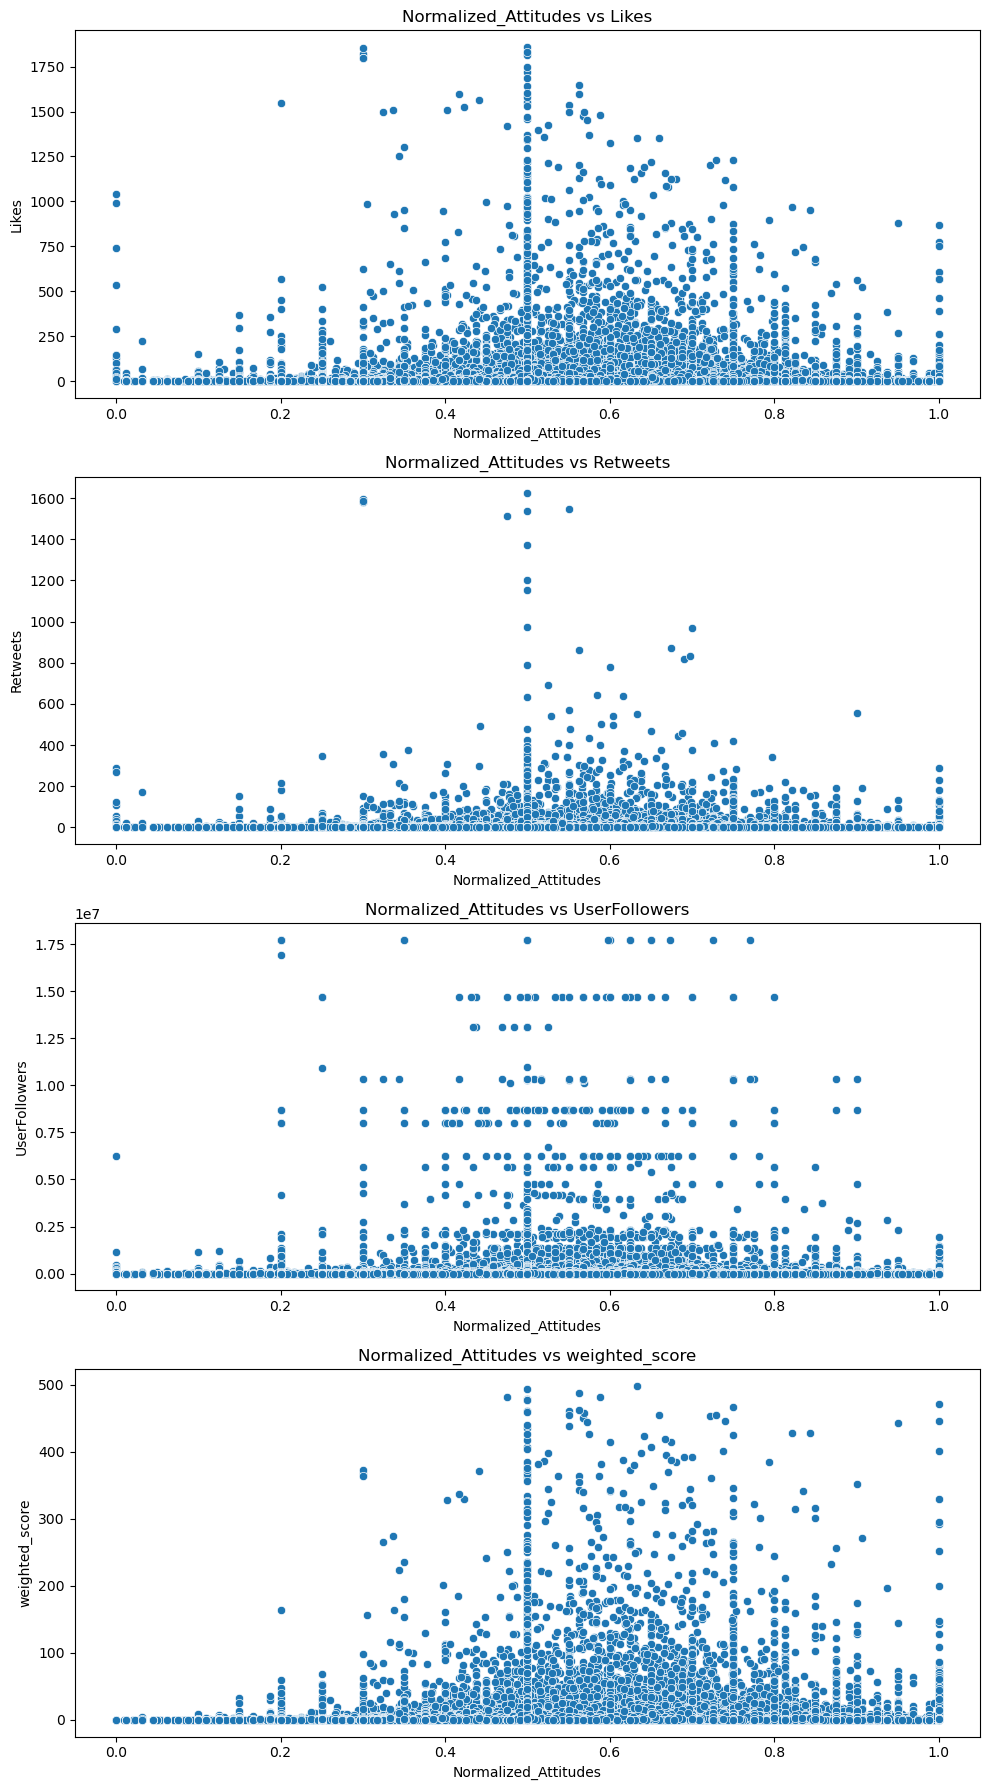

In [57]:
df_filtered = df[df['weighted_score'] < 500]

fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# Scatter plot for Normalized_Attitudes and Likes
sns.scatterplot(x='Normalized_Attitudes', y='Likes', data=df_filtered, ax=axs[0])
axs[0].set_title('Normalized_Attitudes vs Likes')

# Scatter plot for Normalized_Attitudes and Retweets
sns.scatterplot(x='Normalized_Attitudes', y='Retweets', data=df_filtered, ax=axs[1])
axs[1].set_title('Normalized_Attitudes vs Retweets')

# Scatter plot for Normalized_Attitudes and UserFollowers
sns.scatterplot(x='Normalized_Attitudes', y='UserFollowers', data=df_filtered, ax=axs[2])
axs[2].set_title('Normalized_Attitudes vs UserFollowers')

# Scatter plot for Normalized_Attitudes and weighted_score
sns.scatterplot(x='Normalized_Attitudes', y='weighted_score', data=df_filtered, ax=axs[3])
axs[3].set_title('Normalized_Attitudes vs weighted_score')

plt.tight_layout()
plt.show()

<h2>Data Insight</h2>

<h3>Correlation Matrix</h3>

To examine the relationships between each of these features we create a correlation matrix to show how strongly or weakly the variables are correlated to one another.

<AxesSubplot: >

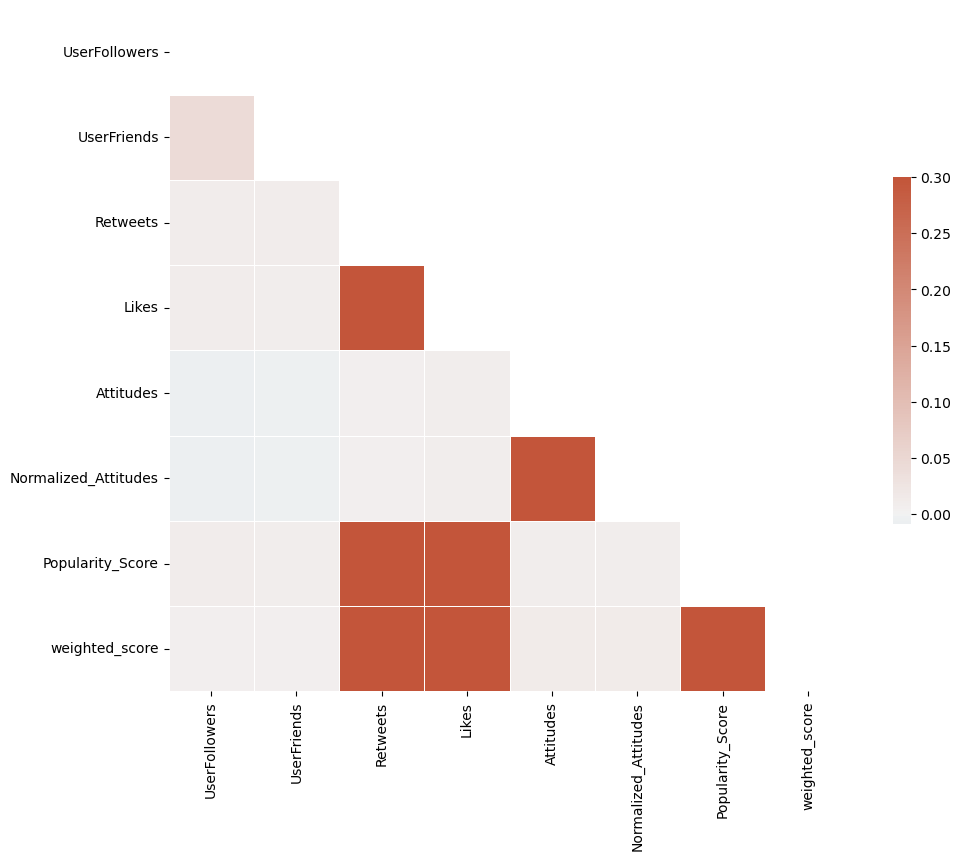

In [62]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = df_numeric.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


We do not find a strong correlation between our measures of popularity and the sentiment of the tweet.

<h3>Linear Regression Model</h3>
We next use the [seaborn](https://seaborn.pydata.org/index.html) library to plot a linear regression fit.

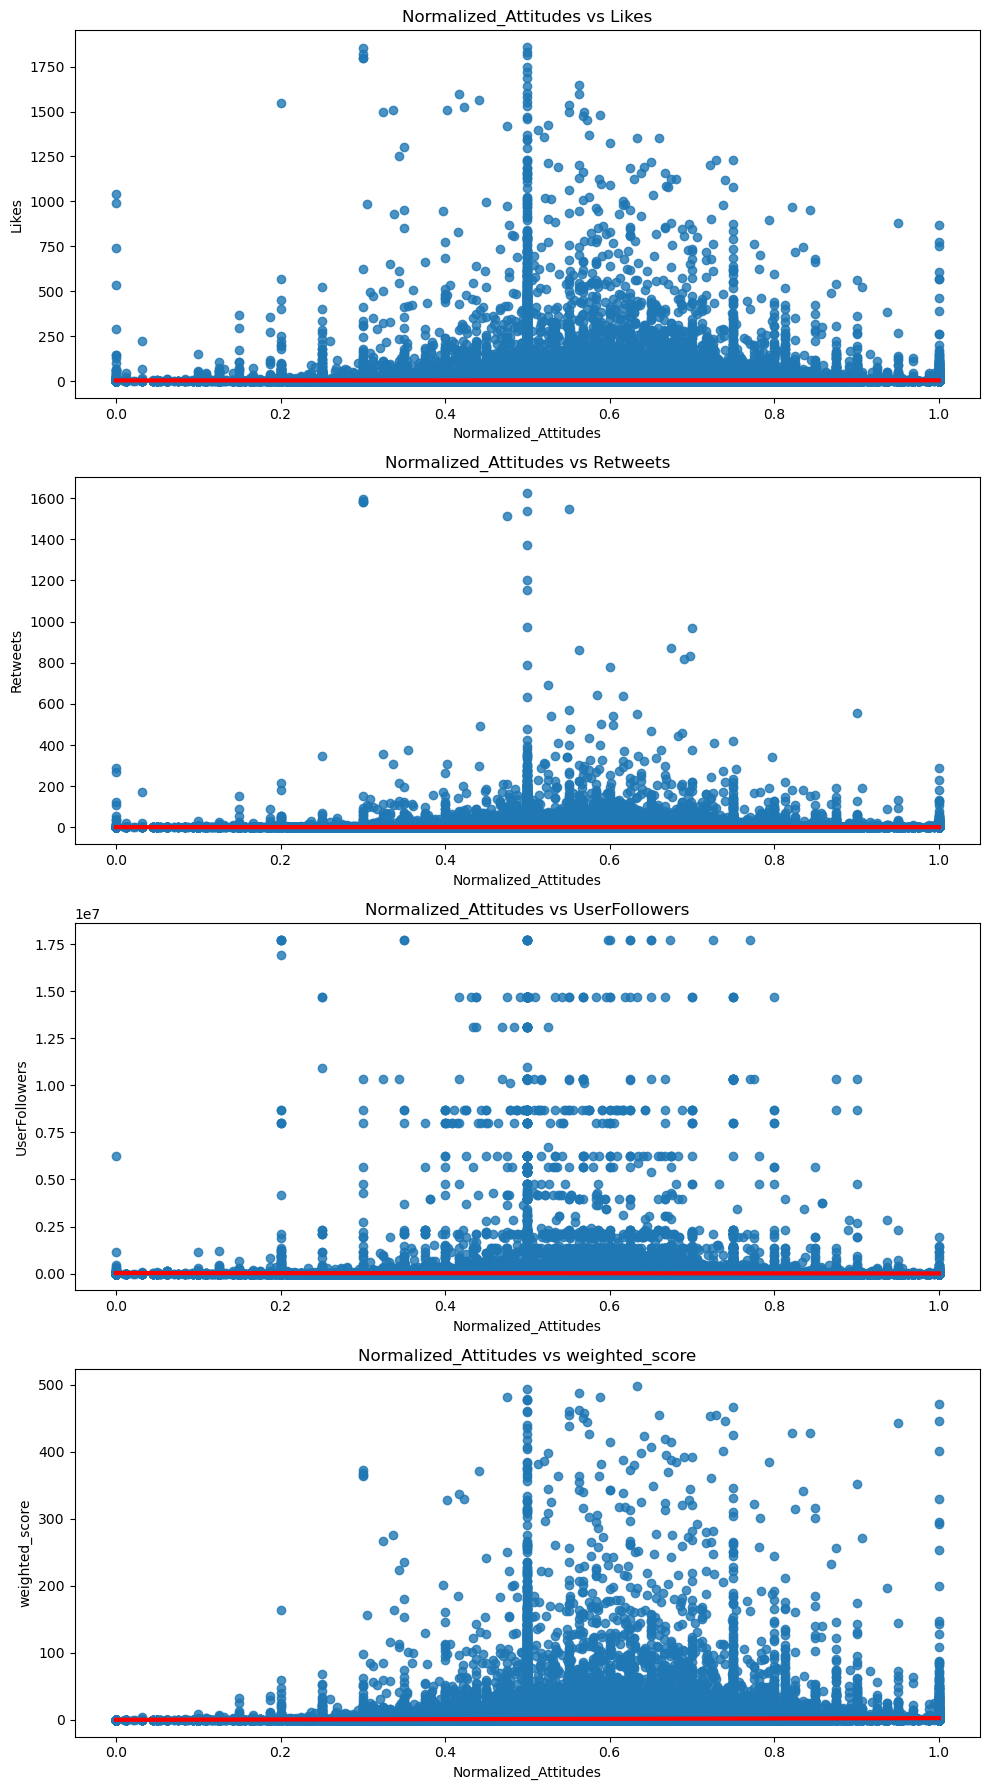

In [61]:
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# Scatter plot for Normalized_Attitudes and Likes
sns.regplot(x='Normalized_Attitudes', y='Likes', data=df_filtered, ax=axs[0], line_kws={"color": "red", "lw": 3})
axs[0].set_title('Normalized_Attitudes vs Likes')

# Scatter plot for Normalized_Attitudes and Retweets
sns.regplot(x='Normalized_Attitudes', y='Retweets', data=df_filtered, ax=axs[1], line_kws={"color": "red", "lw": 3})
axs[1].set_title('Normalized_Attitudes vs Retweets')

# Scatter plot for Normalized_Attitudes and UserFollowers
sns.regplot(x='Normalized_Attitudes', y='UserFollowers', data=df_filtered, ax=axs[2], line_kws={"color": "red", "lw": 3})
axs[2].set_title('Normalized_Attitudes vs UserFollowers')

# Scatter plot for Normalized_Attitudes and weighted_score
sns.regplot(x='Normalized_Attitudes', y='weighted_score', data=df_filtered, ax=axs[3], line_kws={"color": "red", "lw": 3})
axs[3].set_title('Normalized_Attitudes vs weighted_score')

plt.tight_layout()
plt.show()

Our trend line ends up being horizontal, meaning that although these metrics demonstrate some overall trends, there is not a significant enough relationship with sentiment to be predictive, confirming our previous results.

## Insight and Conclusion

We found that our hypothesis was incorrect, and people on Twitter have consistently favorable attitudes towards chat gpt during the time frame of our data set. We did find features of the data that could form the basis of a predictive model for ChatGPT tweet sentiment. One limitation of the dataset is its limited time frame because of how recently Chat-GPT was released. Given more time and a larger sample set, it would be interesting to see if the trends we observed in the data continue or change, or if predictive model of sentiment could be built.

Over time interest in Chat GPT has increased, but the proportion of users that maintain a positive attitude towards Chat GPT remains about the same (~50 %). Despite these findings we maintain some doubts about whether all of these users who posted tweets were unique individuals, or even real users at all since there is an incentive for people to garner engagement on twitter. In response, we decided to analyze only tweets wihtout URLs in an effort to reduce the number of tweets that are attempting to advertise a service. Even after this change we found that the distribution in sentiment was about the same. A deeper analysis using bot identification or a more powerful ad removal filter could be a worthwhile extension of this project. It is important to note that while these findings may be relevant to the perception of AI and ChatGPT as a whole, it is not indicative of the perception of the population as a whole. The demographic of the data may not be representative to the entire population of current society, or even to the population of twitter users as a whole, since many people still are not familiar with AI technology.

The conversation regarding AI, and its implications on society, is one that is still in its infancy. The full capabilities of AI are still not entirely known, but understanding where people stand in the early development stages can aid responsible decision making in the near future. Governments are still deciding how to respond to AI, and their constituents will have influence over those decisions. Comprehensive research on those views, and how they were formed, will be an important component of any future business or policy discussion.